In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [35]:
#Function that converts any number into a binary sting
def decimalToBinary(n): 
    string = "{0:b}".format(int(n))

    if len(string) < 8:                                 #The function will sometimes give outputs like
        for i in range(8 - len(string)):                #100101 or 0110. We want an 8 digit number                        
            string = '0' + string                       #The following just appeneds a bunch of '0's
                                                        #infront of the string until it's 8 digits
    return string

In [ ]:
#Creating a function for the cellular automata
#I want to input a triplet (110,010,001,etc) and the rule number
def ca(list, rule_i):

    rule_binary = decimalToBinary(rule_i)               #Convert rule number into binary string

    rule_dict = {                                       
        '111':rule_binary[0],                           #I create a dictionary so that if I call
        '110':rule_binary[1],                           #for example "111", it will give me the 
        '101':rule_binary[2],                           #0th character in my binary string 
        '100':rule_binary[3],
        '011':rule_binary[4],
        '010':rule_binary[5],
        '001':rule_binary[6],
        '000':rule_binary[7],
    }

    #converting the list into a string so I can use it to call in the dictionary
    string = ''
    for i in range(len(list)):
        string += str(list[i]) + ''


    return int((rule_dict[string]))


In [ ]:
#Makiing a function that does the next step of the CA
def apply_rules(list_0, rule_1):
    list_n = []
    length = len(list_0)
    for i in range(len(list_0)):
        twanslator = [list_0[i-1],list_0[i],list_0[(i+1)%length]]   #Make slicing of 3
        list_n.append(ca(twanslator,rule_1))                        #Apply CA for each triplet 
    return list_n                                                   #save outputs as a list as next gen


In [36]:
#Just optimizing the steps for easier visualization and easier input
#Make a function that requires: rule number, size/length, # of steps, and where the dot is
def ca_generator(rule, cells, steps, seed):
    Lattice = np.zeros((steps, cells))
    Lattice = Lattice.astype(int)
    
    if seed == 'left': Lattice[0][0] = 1
    if seed == 'right': Lattice[0][-1] = 1


    for i in range(1,steps):
        prev = Lattice[i-1]
        arr_list = prev.tolist()
        Lattice[i] = apply_rules(prev,rule)

    return Lattice

Text(0.5, 1.0, 'Rule 30')

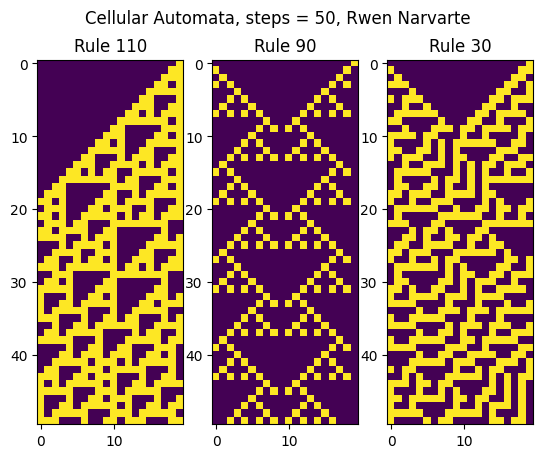

In [37]:
steps = 50
rule_list = [110,90,30]
size = 20

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle(f'Cellular Automata, steps = {steps}, Rwen Narvarte')
ax1.imshow(ca_generator(rule_list[0],size,steps,'right'))
ax1.set_title(f'Rule {rule_list[0]}')
ax2.imshow(ca_generator(rule_list[1],size,steps,'right'))
ax2.set_title(f'Rule {rule_list[1]}')
ax3.imshow(ca_generator(rule_list[2],size,steps,'right'))
ax3.set_title(f'Rule {rule_list[2]}')